In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/international-cp/parsing_categories.csv
/kaggle/input/international-cp/data/train_dataset_hackaton2023_train.gzip
/kaggle/input/international-cp/data/hackaton2023_test.gzip


In [106]:
df = pd.read_parquet('/kaggle/input/international-cp/data/train_dataset_hackaton2023_train.gzip')

cats = pd.read_csv('/kaggle/input/international-cp/parsing_categories.csv')

In [123]:
cats[cats.item_category == 'Дополнительно']

,Unnamed: 0,dish_name,item_name,item_category,item_price
15,15,Влажная салфетка,Влажная салфетка,Дополнительно,9.99
60,60,Жевательная резинка Орбит сладкая мята,Жевательная резинка Орбит сладкая мята,Дополнительно,49.99
163,163,Комплект Стикстеров,NaN,Дополнительно,NaN
187,187,Жевательная резинка Орбит bubblemint,Жевательная резинка Орбит bubblemint,Дополнительно,49.99
355,355,Пакет Новый,NaN,Дополнительно,NaN
376,376,3D-ПАТЧ,NaN,Дополнительно,NaN
457,457,Пакет,Бумажный пакет,Дополнительно,19.99
678,678,Комикс,NaN,Дополнительно,NaN
687,687,Игрушка Mattel,NaN,Дополнительно,NaN
799,799,Антисептик Армасепт Гель,NaN,Дополнительно,NaN


In [108]:
df = df.merge(cats[['dish_name', 'item_category', 'item_price']], left_on='dish_name', right_on='dish_name', how='left')

In [113]:
df[df.item_category == 'Кинг Сет']

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name,item_category,item_price
19,29891,9.0,1,train,199.96,2022-12-29 09:27:00,Сырбургер Чикен New,463.00,Отдельно стоящий с внешней зоной,Кинг Сет,309.99
54,30477,10.0,1,train,279.99,2022-10-19 09:21:42,Чеддер Бекон Чикен,320.00,Отдельно стоящий без внешней зоны,Кинг Сет,309.99
696,68632,1.0,1,train,1.00,2023-01-01 19:16:25,Сырбургер Чикен New,431.10,Отдельно стоящий,Кинг Сет,309.99
1404,186473,1.0,1,train,259.99,2023-01-11 17:42:35,Чикен Родео BBQ,150.00,Фудкорт без туалета,Кинг Сет,309.99
1505,186473,1.0,1,train,99.99,2023-02-28 17:55:21,Сырбургер Чикен New,365.30,Отдельно стоящий с внешней зоной,Кинг Сет,309.99
...,...,...,...,...,...,...,...,...,...,...,...
12125316,46211920,12.0,1,train,99.99,2023-07-18 12:42:45,Сырбургер Чикен New,289.00,Отдельно стоящий без внешней зоны,Кинг Сет,309.99
12127527,46354314,8.0,1,train,100.98,2023-07-25 10:43:06,Сырбургер Чикен New,978.70,Отдельно стоящий с внешней зоной,Кинг Сет,309.99
12127541,46354314,8.0,1,train,100.98,2023-07-26 17:13:55,Сырбургер Чикен New,244.50,Отдельно стоящий с внешней зоной,Кинг Сет,309.99
12127546,46354314,8.0,1,train,1.00,2023-07-26 17:38:06,Сырбургер Чикен New,244.50,Отдельно стоящий с внешней зоной,Кинг Сет,309.99


In [122]:
df.item_category.value_counts()

item_category
Говядина                                                                2063900
Картофель                                                               2008898
Закуски                                                                 1857428
Соусы                                                                   1308805
Холодные напитки                                                         953889
Новинки, А4 Бокс, Купоны                                                 767861
Десерты                                                                  761203
Курица                                                                   642315
Горячие напитки                                                          556940
Роллы                                                                    383372
Дополнительно                                                            152941
Холодные напитки, Молочные коктейли, Десерты                             106047
Кинг Комбо                

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['format_name'] = le.fit_transform(df['format_name'])

In [56]:
def time_of_day(hour):
    if hour < 6:
        return 'night'
    elif hour < 12:
        return 'morning'
    elif hour < 17:
        return 'noon'
    else:
        return 'evening'

In [57]:
def is_weekend(day):
    if day in [5, 6]:
        return 1
    else:
        return 0

In [58]:
df['day_of_week'] = df['startdatetime'].dt.dayofweek
df['month'] = df['startdatetime'].dt.month
df['hour'] = df['startdatetime'].dt.hour
df['time_of_day'] = df['hour'].apply(time_of_day)
df['is_weekend'] = df['day_of_week'].apply(is_weekend)

In [59]:
df['format_name'] = df['format_name'].astype(str)

In [63]:
import pandas as pd
import numpy as np

def aggregate_features(df):
    # Aggregating revenue
    revenue_agg = df.groupby('customer_id')['revenue'].agg(['min', 'max', 'mean', 'median', 'std', 'count', 'sum']).rename(columns=lambda x: f'revenue_{x}')

    # Aggregating ownareaall_sqm
    area_agg = df.groupby('customer_id')['ownareaall_sqm'].agg(['min', 'max', 'mean', 'median', 'std', 'count']).rename(columns=lambda x: f'ownareaall_sqm_{x}')

    format_name_freq = df.groupby(['customer_id', 'format_name']).size().unstack(fill_value=0).add_prefix('format_name_').add_suffix('_frequency')
    
    # Frequency of purchases by day of week
    day_of_week_freq = df.groupby(['customer_id', 'day_of_week']).size().unstack(fill_value=0).add_prefix('dayofweek_').add_suffix('_frequency')
    month_freq = df.groupby(['customer_id', 'month']).size().unstack(fill_value=0).add_prefix('month_').add_suffix('_frequency')
    time_of_day_freq = df.groupby(['customer_id', 'time_of_day']).size().unstack(fill_value=0).add_prefix('time_of_day_').add_suffix('_frequency')
    hour_freq = df.groupby(['customer_id', 'hour']).size().unstack(fill_value=0).add_prefix('hour_').add_suffix('_frequency')
    is_weekend_freq = df.groupby(['customer_id', 'is_weekend']).size().unstack(fill_value=0).add_prefix('is_weekend_').add_suffix('_frequency')
    
    # Calculate average days between purchases
    df.sort_values(['customer_id', 'startdatetime'], inplace=True)
    df['previous_purchase'] = df.groupby('customer_id')['startdatetime'].shift(1)
    df['days_between_purchases'] = (df['startdatetime'] - df['previous_purchase']).dt.days
    days_between = df.groupby('customer_id')['days_between_purchases'].agg(['min', 'max', 'mean', 'median', 'std', 'count']).fillna(-1).rename(columns=lambda x: f'days_between_purchases_{x}')

    df['hours_between_purchases'] = (df['startdatetime'] - df['previous_purchase']).dt.total_seconds() / 3600
    hours_between = df.groupby('customer_id')['hours_between_purchases'].agg(['min', 'max', 'mean', 'median', 'std', 'count']).fillna(-1).rename(columns=lambda x: f'hours_between_purchases_{x}')
    
    # Merging all aggregated features
    final_df = pd.concat([revenue_agg, area_agg, format_name_freq, day_of_week_freq, month_freq, time_of_day_freq, hour_freq, is_weekend_freq, days_between, hours_between], axis=1).reset_index()
    return final_df

# Example usage
# aggregated_data = aggregate_features(df)

df_agg = aggregate_features(df)

In [80]:
df.index = df.customer_id

In [83]:
df = df.drop(columns=['customer_id'])

In [85]:
def generate_pivot_features(df, col, value, aggfunc):
    pivot = df.pivot_table(values=[value], index=df.index, columns=[col], aggfunc=aggfunc)
    pivot.columns = [f'{col}_{v}_{value}_{aggfunc}' for _, v in pivot.columns]
#     pivot = pivot.reset_index()

    return pivot

In [86]:
def preprocess(df):
    aggs = ['min', 'max', 'mean', 'median', 'std', 'count', 'sum']
    columns = ['format_name', 'day_of_week', 'month', 'hour', 'time_of_day', 'is_weekend']
    pivot_tables = []
    
    
    for col in columns:
        for agg in aggs:
            col_agg = generate_pivot_features(df, col, 'revenue', agg)
            pivot_tables.append(col_agg)
            
    # the rest
    
    data = pd.concat(pivot_tables, axis=1)

    return data

In [87]:
data = preprocess(df)

In [88]:
display(data)

,format_name_0_revenue_min,format_name_1_revenue_min,format_name_2_revenue_min,format_name_3_revenue_min,format_name_4_revenue_min,format_name_5_revenue_min,format_name_6_revenue_min,format_name_7_revenue_min,format_name_8_revenue_min,format_name_0_revenue_max,...,is_weekend_0_revenue_mean,is_weekend_1_revenue_mean,is_weekend_0_revenue_median,is_weekend_1_revenue_median,is_weekend_0_revenue_std,is_weekend_1_revenue_std,is_weekend_0_revenue_count,is_weekend_1_revenue_count,is_weekend_0_revenue_sum,is_weekend_1_revenue_sum
customer_id,,,,,,,,,,,,,,,,,,,,,
29891,NaN,NaN,9.99,NaN,NaN,NaN,1.00,NaN,NaN,NaN,...,149.754839,148.316667,149.99,84.990,113.353350,109.685004,31.0,3.0,4642.40,444.95
30477,NaN,NaN,0.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.042623,NaN,59.99,NaN,92.597587,NaN,61.0,NaN,5675.60,NaN
31426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,...,114.038986,89.700000,40.00,39.990,181.206533,147.527208,69.0,17.0,7868.69,1524.90
44491,NaN,NaN,NaN,19.99,NaN,NaN,NaN,19.99,NaN,NaN,...,NaN,51.490000,NaN,23.995,NaN,66.700159,NaN,10.0,NaN,514.90
44939,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,NaN,NaN,...,NaN,66.593200,NaN,43.970,NaN,79.076410,NaN,25.0,NaN,1664.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46624509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,...,85.081818,NaN,79.99,NaN,45.032463,NaN,11.0,NaN,935.90,NaN
46625265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.99,NaN,...,92.297692,NaN,70.00,NaN,44.184056,NaN,13.0,NaN,1199.87,NaN
46639170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,...,99.083636,NaN,119.99,NaN,78.658136,NaN,11.0,NaN,1089.92,NaN


In [89]:
target = df.groupby('customer_id').buy_post.first()

In [66]:
df_agg.index = df_agg.customer_id

In [67]:
df_agg = df_agg.drop(columns=['customer_id'])

In [90]:
display(df_agg)

,revenue_min,revenue_max,revenue_mean,revenue_median,revenue_std,revenue_count,revenue_sum,ownareaall_sqm_min,ownareaall_sqm_max,ownareaall_sqm_mean,...,days_between_purchases_mean,days_between_purchases_median,days_between_purchases_std,days_between_purchases_count,hours_between_purchases_min,hours_between_purchases_max,hours_between_purchases_mean,hours_between_purchases_median,hours_between_purchases_std,hours_between_purchases_count
customer_id,,,,,,,,,,,,,,,,,,,,,
29891,1.00,439.98,149.627941,147.480,111.401093,34,5087.35,300.00,463.00,439.029412,...,1.454545,0.0,2.728220,33,0.0,266.930556,42.117180,17.475,67.319528,33
30477,0.39,399.99,93.042623,59.990,92.597587,61,5675.60,320.00,320.00,320.000000,...,0.633333,0.0,1.775222,60,0.0,216.970278,20.791093,0.000,45.916679,60
31426,1.00,854.99,109.227791,39.995,174.529392,86,9393.59,153.00,153.00,153.000000,...,0.470588,0.0,1.210944,85,0.0,164.914167,14.174327,0.000,33.372515,85
44491,19.99,229.99,51.490000,23.995,66.700159,10,514.90,88.42,139.00,128.884000,...,2.888889,0.0,8.666667,9,0.0,644.695278,74.243179,0.000,214.056635,9
44939,1.00,267.97,66.593200,43.970,79.076410,25,1664.83,129.27,280.00,171.474400,...,0.625000,0.0,2.122601,24,0.0,198.381111,15.447731,0.000,52.476657,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46624509,1.00,189.99,85.081818,79.990,45.032463,11,935.90,112.53,112.53,112.530000,...,0.100000,0.0,0.316228,10,0.0,28.974167,2.932667,0.000,9.150721,10
46625265,49.99,169.98,92.297692,70.000,44.184056,13,1199.87,120.00,120.00,120.000000,...,0.000000,0.0,0.000000,12,0.0,0.206944,0.030162,0.000,0.071309,12
46639170,1.00,179.99,99.083636,119.990,78.658136,11,1089.92,80.20,80.20,80.200000,...,0.000000,0.0,0.000000,10,0.0,2.242222,0.341194,0.000,0.762428,10


In [93]:
df_agg = df_agg.join(data)

In [96]:
df_agg.head(1)

,revenue_min,revenue_max,revenue_mean,revenue_median,revenue_std,revenue_count,revenue_sum,ownareaall_sqm_min,ownareaall_sqm_max,ownareaall_sqm_mean,...,is_weekend_0_revenue_mean,is_weekend_1_revenue_mean,is_weekend_0_revenue_median,is_weekend_1_revenue_median,is_weekend_0_revenue_std,is_weekend_1_revenue_std,is_weekend_0_revenue_count,is_weekend_1_revenue_count,is_weekend_0_revenue_sum,is_weekend_1_revenue_sum
customer_id,,,,,,,,,,,,,,,,,,,,,
29891,1.0,439.98,149.627941,147.48,111.401093,34,5087.35,300.0,463.0,439.029412,...,149.754839,148.316667,149.99,84.99,113.35335,109.685004,31.0,3.0,4642.4,444.95


In [94]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

# Sample dataset - replace with your own
# X, y = load_your_data() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_agg, target, test_size=0.3, random_state=42, stratify=target)

# X_train, X_test, y_train, y_test = train_test_split(df_agg, target, test_size=0.3, random_state=42)

# If you have categorical features, you might need to encode them
# label_encoder = LabelEncoder()
# X_train['your_categorical_column'] = label_encoder.fit_transform(X_train['your_categorical_column'])
# X_test['your_categorical_column'] = label_encoder.transform(X_test['your_categorical_column'])

# Define the LightGBM model
model = lgb.LGBMClassifier(objective='binary', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Evaluate the model
f1_train = f1_score(y_train, y_pred_train)
f1 = f1_score(y_test, y_pred)
print(f'F1 score train: {f1_train}\nF1 Score test: {f1}')


F1 score train: 0.8414360680689894
F1 Score test: 0.8389447205045911


In [125]:
from sklearn.metrics import roc_auc_score

y_pred = model.predict_proba(X_test)[:, 1]
y_pred_train = model.predict_proba(X_train)[:, 1]

auc_train = roc_auc_score(y_train, y_pred_train)
auc = roc_auc_score(y_test, y_pred)
print(f'auc score train: {auc_train}\nauc Score test: {auc}')

auc score train: 0.7525064561750309
auc Score test: 0.7360951411571584


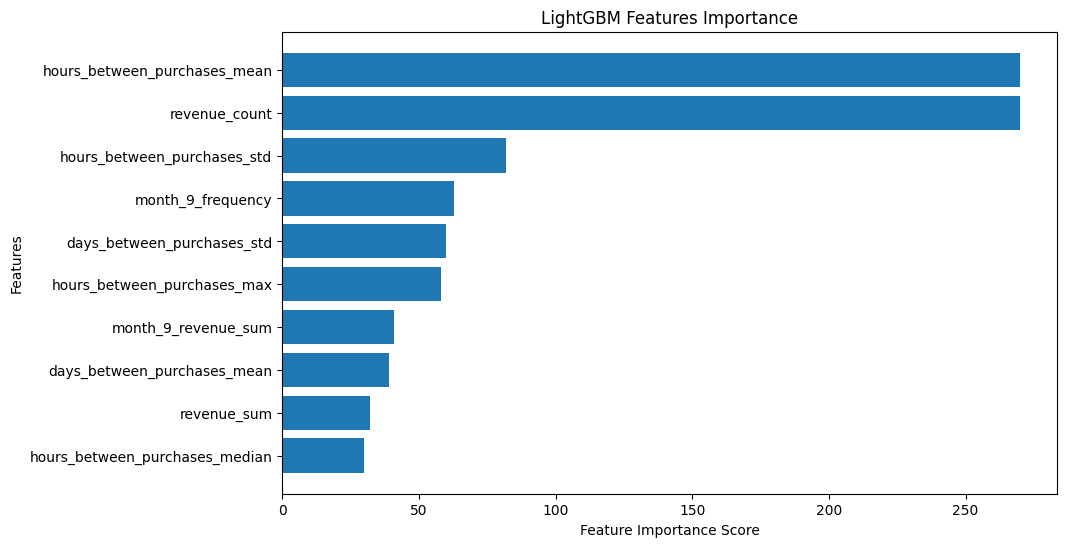

In [95]:
import lightgbm as lgb
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn.metrics import f1_score

# Assuming you have a dataset and a trained LightGBM model
# X, y = load_your_data()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model = lgb.LGBMClassifier(objective='binary', random_state=42)
# model.fit(X_train, y_train)

# Get feature importances
feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': X_train.columns})

# Sorting the DataFrame by feature importance
feature_imp = feature_imp.sort_values(by="Value", ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.title('LightGBM Features Importance')
plt.barh(feature_imp['Feature'][:10], feature_imp['Value'][:10])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()
